<a href="https://colab.research.google.com/github/nicolecosta/visaocomputacional/blob/main/resumao_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **VISÃO COMPUTACIONAL - RESUMÃO PT2**

**NICOLE SARVASI ALVES DA COSTA**

#### <b>AULA 11- Morfologia Matemática</b>

A Morfologia Matemática (MM) é um modelo teórico para as imagens digitais construídas em cima da teoria dos reticulados e da topologia. É o fundamento do processamento de imagem morfológico, que é baseado nos operadores de deslocamento-invariante (translação invariante) baseados principalmente na adição de Minkowski.

#### <b>DILATAÇÃO BINÁRIA</b>

A dilatação, também as vezes chamada de dilação, é uma transformação morfológica que combina dois conjuntos usando adição vetorial. 

Em OpenCV, a operação de dilatação pode ser realizada da seguinte forma:

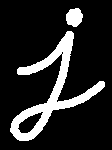

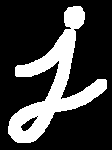

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
img = cv.imread('j.png',0)
cv2_imshow(img)
print("")
kernel = np.ones((5,5),np.uint8)
dilation = cv.dilate(img,kernel,iterations = 1) #quanto mais iterações , mais dilatada a imagem
cv2_imshow(dilation)

FAZENDO CONTORNO COM A OPERAÇÃO DE DILATAÇÃO:

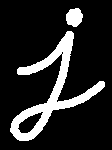

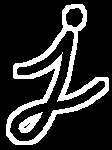

In [ ]:
import cv2 as cv
import numpy as np
img = cv.imread('j.png',0)
cv2_imshow(img)
print("")
kernel = np.ones((3,3),np.uint8)
dilation = cv.dilate(img,kernel,iterations = 4)
cont=dilation-img
cv2_imshow(cont)

#### <b>EROSÃO BINÁRIA</b>

A erosão basicamente encolhe uma imagem e pode ser vista como uma transformação morfológica que combina dois conjuntos de vetores de subtração.

Em OpenCV, a operação de dilatação pode ser realizada da seguinte forma:

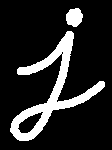

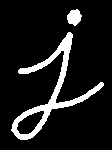

In [ ]:
import cv2 as cv
import numpy as np
img = cv.imread('j.png',0)
cv2_imshow(img)
print("")
kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)
cv2_imshow(erosion)

FAZENDO CONTORNO COM A OPERAÇÃO DE EROSÃO:

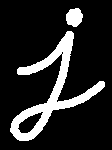

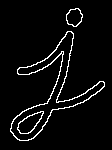

In [ ]:
img = cv.imread('j.png',0)
cv2_imshow(img)
print("")
kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)
cont=img-erosion
cv2_imshow(cont)

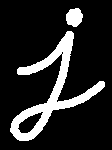

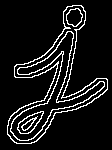

In [ ]:
img = cv.imread('j.png',0)
cv2_imshow(img)
print("")
kernel = np.ones((3,3),np.uint8)
dilation = cv.dilate(img,kernel,iterations = 3)
dilationm = cv.dilate(img,kernel,iterations = 2)
dilation=dilation-dilationm
erosion = cv.erode(img,kernel,iterations = 1)
dupcont=dilation+(img-erosion)
cv2_imshow(dupcont)

A igualdade abaixo é não é válida:

(A ⊕ B)θ B = A

Combinando as operações de dilatação e erosão para obter um contorno mais grossoda imagem binária:

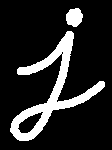

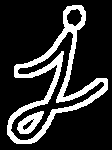

In [ ]:
import cv2 as cv
import numpy as np
img = cv.imread('j.png',0)
cv2_imshow(img)
print("")


kernel = np.ones((3,3),np.uint8)
dilation = cv.dilate(img,kernel,iterations = 3)
erosion = cv.erode(img,kernel,iterations = 1)
dupcont=(dilation-img)+(img-erosion)
cv2_imshow(dupcont)

#### <b>ABERTURA BINÁRIA</b>

A abertura em geral suaviza o contorno de uma imagem, quebra estreitos e elimina proeminências delgadas, a operação de abertura é usada também para remover ruídos da imagem. 

Em OpenCV, a operação de abertura pode ser realizada de seguinte forma:

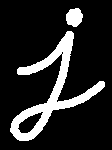

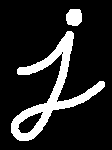

In [ ]:
import cv2 as cv
import numpy as np
img = cv.imread('j.png',0)
cv2_imshow(img)
print("")
kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
cv2_imshow(opening)

#aplicar varias vezes melhora o resultado

#### <b>FECHAMENTO BINÁRIO</b>

O fechamento funde pequenas quebras e alarga golfos estreitos elimina pequenos orifícios. Se uma abertura cria pequenos vazios na imagem, um fechamento irá preencher ou fechar os vazios, estas operações podem remover muito dos pixels brancos com ruídos, ou seja, basicamente ele é igual a abertura só que que primeiramente é feita a dilatação e após é feita a erosão.

Em OpenCV, a operação de fechamento pode ser realizada da seguinte forma:

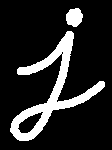

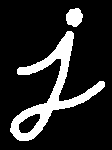

In [3]:
import cv2 as cv
import numpy as np
img = cv.imread('j.png',0)
cv2_imshow(img)
print("")
kernel = np.ones((5,5),np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
cv2_imshow(closing)

Aplicando a operação de fechamento várias vezes:

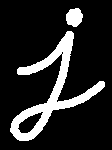

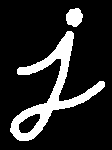

In [4]:
import cv2 as cv
import numpy as np
img = cv.imread('j.png',0)
cv2_imshow(img)
print("")
kernel = np.ones((5,5),np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
cv2_imshow(closing)

#### <b>AULA 12- Contornos e Tamanhos de Objetos</b>

Queremos obter os contornos e os tamanhos dos objetos abaixo.

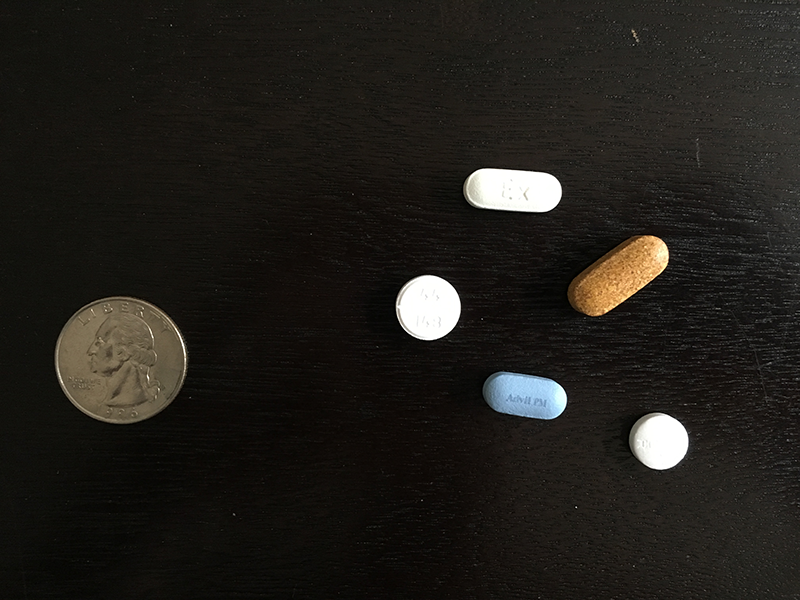

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.imread('objects.png')
cv2_imshow(img)

#### <b>Primeiro Passo- Obtenção das Arestas</b>

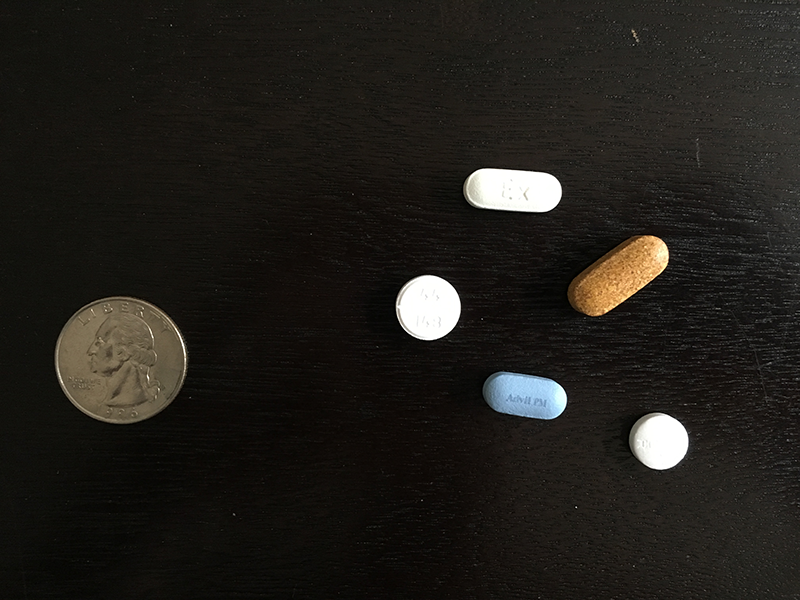

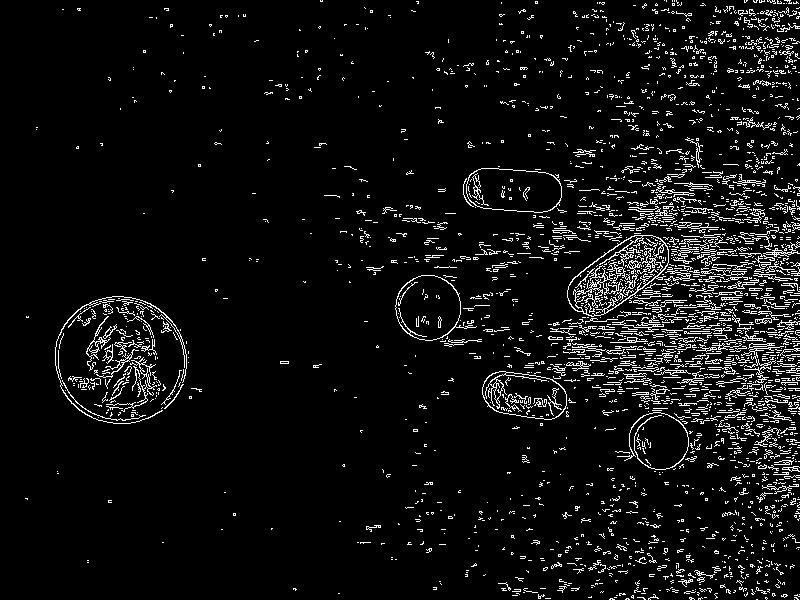

In [6]:
image = cv.imread('objects.png')
cv2_imshow(image)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
edged = cv.Canny(gray, 50, 100)
cv2_imshow(edged)

A seguir, temos um cálculo mais elaborado de arestas, que faz uso das operações morfológicas de erosão e dilatação vistas na última aula:

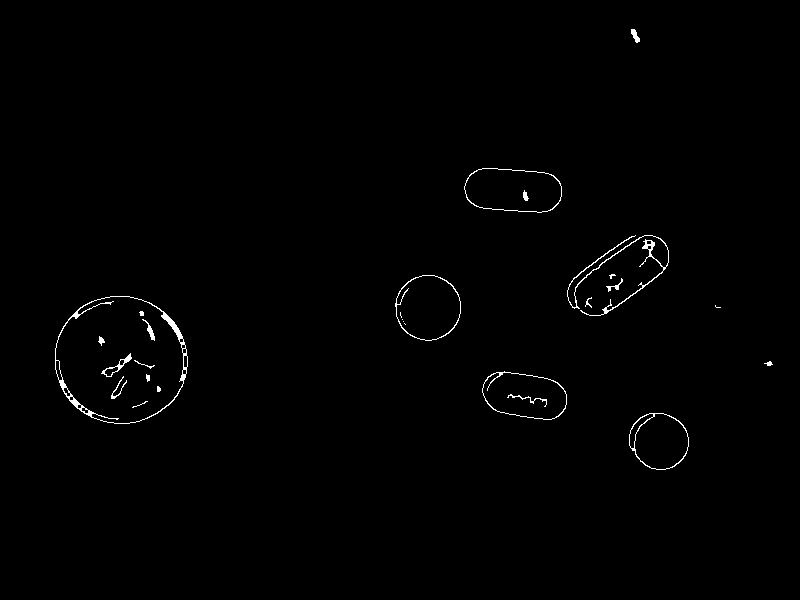

In [7]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours

#carregamos a imagem, convertemos para níveis de cinza e a borramos levemente
image = cv.imread('objects.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (7, 7), 0)

#calculamos as arestas e realizamos uma dilatação + erosão para fechar
#eventuais gaps entre as arestas dos objetos
edged = cv.Canny(gray, 50, 100)
edged = cv.dilate(edged, None, iterations=1)
edged = cv.erode(edged, None, iterations=1)
cv2_imshow(edged)

#### <b>Obtenção dos Contornos</b>

Para a obtenção dos contornos fazemos uso de módulos de utilitários para imagens (imutils).

In [8]:
import imutils
from imutils import contours
cnts = cv.findContours(edged.copy(),cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
(cnts, _) = contours.sort_contours(cnts)

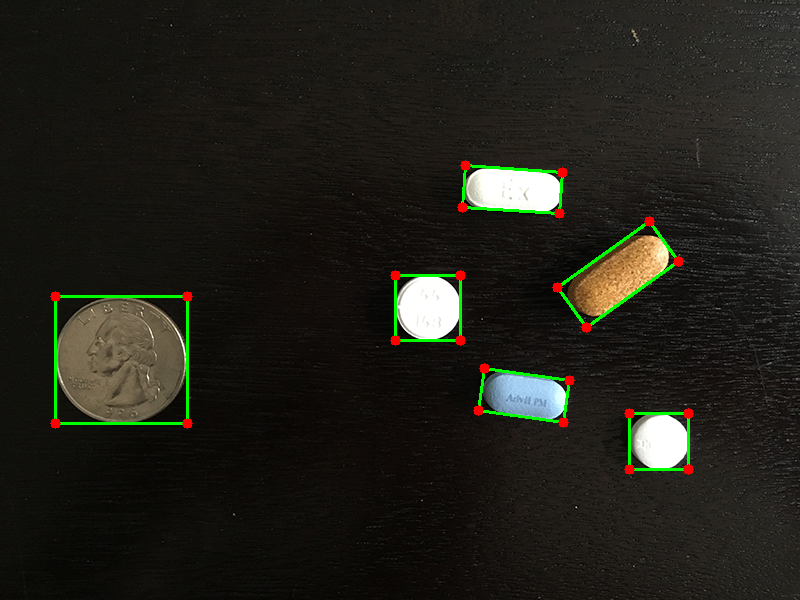

In [9]:
from imutils import perspective
import numpy as np

orig = image.copy()

#Percorre todos os contornos
for c in cnts:
  # se o contorno não é suficientemente grande, ignorá-lo
  if cv.contourArea(c) < 100:
    continue
  # calcula a bounding box rotacionada do contorno
  box = cv.minAreaRect(c)
  box = cv.boxPoints(box) 
  box = np.array(box, dtype="int")
  #ordena os pontos do contorno de tal modo que eles
  #apareçam na seguinte ordem: topo-esquerda, topo-direita,
  #base-direita e base-esquerda
  box = perspective.order_points(box)
  cv.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
  for (x, y) in box:
    cv.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)
cv2_imshow(orig)


#### <b>Obtenção dos Pontos Médios</b>


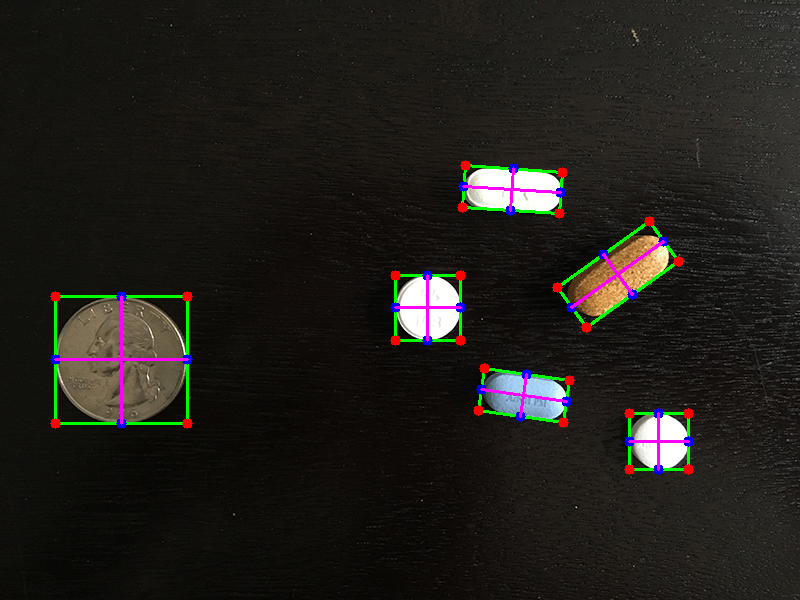

In [10]:
from imutils import perspective
import numpy as np

def midpoint(ptA, ptB):
  return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

orig = image.copy()
#Percorre todos os contornos
for c in cnts:
  # se o contorno não é suficientemente grande, ignorá-lo
  if cv.contourArea(c) < 100:
    continue
  # calcula a bounding box rotacionada do contorno
  box = cv.minAreaRect(c)
  box = cv.boxPoints(box) 
  box = np.array(box, dtype="int")
  #ordena os pontos do contorno de tal modo que eles
  #apareçam na seguinte ordem: top-left, top-right,
  #bottom-right e bottom-left
  box = perspective.order_points(box)
  cv.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
  for (x, y) in box:
    cv.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)

  #obtém os pontos médios de top-left/top-right e bottom-left e bottom-right
  (tl, tr, br, bl) = box
  (tltrX, tltrY) = midpoint(tl, tr)
  (blbrX, blbrY) = midpoint(bl, br)
  
  #obtém os pontos médios de top-left/bottom-left e top-right e bottom-right
  (tlblX, tlblY) = midpoint(tl, bl)
  (trbrX, trbrY) = midpoint(tr, br)

  #desenha cículos nos pontos-médios
  cv.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
  
  #une os pontos-médios com segmentos de reta
  cv.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),(255, 0, 255), 2)
  cv.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),(255, 0, 255), 2)
cv2_imshow(orig)

#### <b>Obtenção das Medidas</b>

Para obter as medidas dos objetos, precisamos tomar um objeto de referência (ponto de calibração) de tamanho conhecido. Na imagem anterior, vamos tomar como medida de referência a moeda de dólar norte-americano, cujo comprimento é de 2.43 cm. A partir dela, definimos as outras medidas.

In [11]:
width=2.43
pixelsPerMetric=None

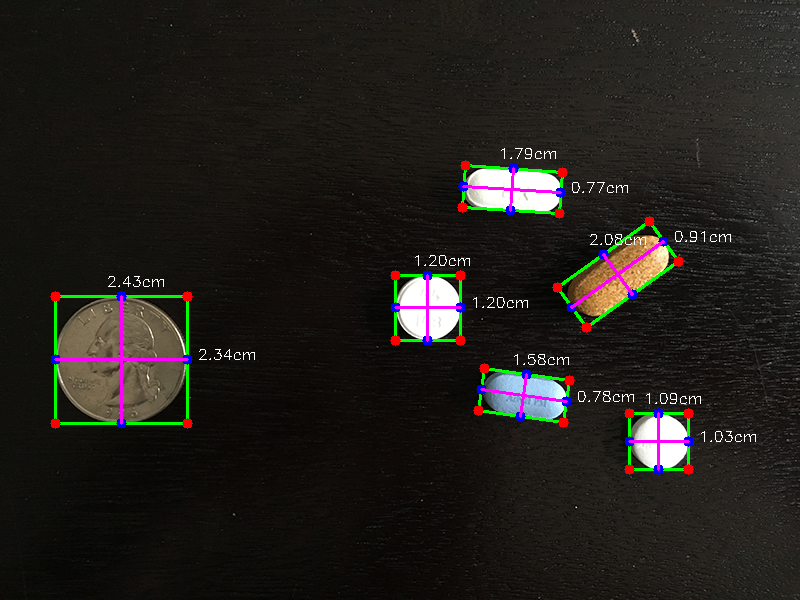

In [12]:
from imutils import perspective
import numpy as np

def midpoint(ptA, ptB):
  return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

orig = image.copy()
#Percorre todos os contornos
for c in cnts:
  # se o contorno não é suficientemente grande, ignorá-lo
  if cv.contourArea(c) < 100:
    continue
  # calcula a bounding box rotacionada do contorno
  box = cv.minAreaRect(c)
  box = cv.boxPoints(box) 
  box = np.array(box, dtype="int")
  #ordena os pontos do contorno de tal modo que eles
  #apareçam na seguinte ordem: top-left, top-right,
  #bottom-right e bottom-left
  box = perspective.order_points(box)
  cv.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
  for (x, y) in box:
    cv.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)

  #obtém os pontos médios de top-left/top-right e bottom-left e bottom-right
  (tl, tr, br, bl) = box
  (tltrX, tltrY) = midpoint(tl, tr)
  (blbrX, blbrY) = midpoint(bl, br)
  
  #obtém os pontos médios de top-left/bottom-left e top-right e bottom-right
  (tlblX, tlblY) = midpoint(tl, bl)
  (trbrX, trbrY) = midpoint(tr, br)

  #desenha cículos nos pontos-médios
  cv.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
  
  #une os pontos-médios com segmentos de reta
  cv.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),(255, 0, 255), 2)
  cv.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),(255, 0, 255), 2)
  
  dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
  dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
  
  if pixelsPerMetric is None:
    pixelsPerMetric = dB / width
  
  dimA = dA / pixelsPerMetric
  dimB = dB / pixelsPerMetric
  
  cv.putText(orig, "{:.2f}cm".format(dimB),(int(tltrX - 15), int(tltrY - 10)), cv.FONT_HERSHEY_SIMPLEX,0.50, (255, 255, 255), 1)
  cv.putText(orig, "{:.2f}cm".format(dimA),(int(trbrX + 10), int(trbrY)), cv.FONT_HERSHEY_SIMPLEX,0.50, (255, 255, 255), 1)
cv2_imshow(orig)


#### <b>Calculando a Área</b>
Calculando a área de cada uma das figuras presentes:

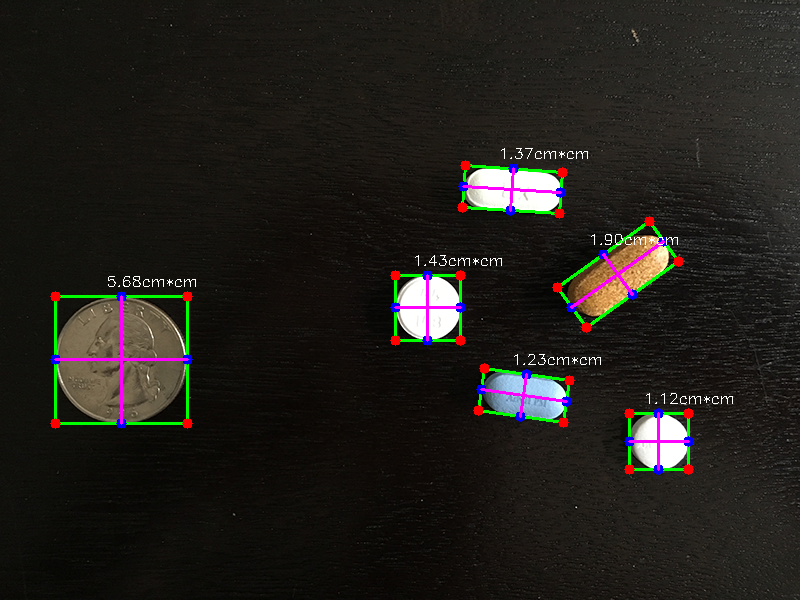

In [13]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import imutils
from imutils import perspective
import numpy as np

#carregamos a imagem, convertemos para níveis de cinza e a borramos levemente
image = cv.imread('objects.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (7, 7), 0)

#calculamos as arestas e realizamos uma dilatação + erosão para fechar
#eventuais gaps entre as arestas dos objetos
edged = cv.Canny(gray, 50, 100)
edged = cv.dilate(edged, None, iterations=1)
edged = cv.erode(edged, None, iterations=1)


cnts = cv.findContours(edged.copy(),cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
(cnts, _) = contours.sort_contours(cnts)

width=2.43
pixelsPerMetric=None


def midpoint(ptA, ptB):
  return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

orig = image.copy()
#Percorre todos os contornos
for c in cnts:
  # se o contorno não é suficientemente grande, ignorá-lo
  if cv.contourArea(c) < 100:
    continue
  # calcula a bounding box rotacionada do contorno
  box = cv.minAreaRect(c)
  box = cv.boxPoints(box) 
  box = np.array(box, dtype="int")
  #ordena os pontos do contorno de tal modo que eles
  #apareçam na seguinte ordem: top-left, top-right,
  #bottom-right e bottom-left
  box = perspective.order_points(box)
  cv.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
  for (x, y) in box:
    cv.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)

  #obtém os pontos médios de top-left/top-right e bottom-left e bottom-right
  (tl, tr, br, bl) = box
  (tltrX, tltrY) = midpoint(tl, tr)
  (blbrX, blbrY) = midpoint(bl, br)
  
  #obtém os pontos médios de top-left/bottom-left e top-right e bottom-right
  (tlblX, tlblY) = midpoint(tl, bl)
  (trbrX, trbrY) = midpoint(tr, br)

  #desenha cículos nos pontos-médios
  cv.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
  
  #une os pontos-médios com segmentos de reta
  cv.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),(255, 0, 255), 2)
  cv.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),(255, 0, 255), 2)
  
  dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
  dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
  
  if pixelsPerMetric is None:
    pixelsPerMetric = dB / width
  
  dimA = dA / pixelsPerMetric
  dimB = dB / pixelsPerMetric
  
  cv.putText(orig, "{:.2f}cm*cm".format(dimA*dimB),(int(tltrX - 15), int(tltrY - 10)), cv.FONT_HERSHEY_SIMPLEX,0.50, (255, 255, 255), 1)
  #cv.putText(orig, "{:.2f}cm".format(dimA),(int(trbrX + 10), int(trbrY)), cv.FONT_HERSHEY_SIMPLEX,0.50, (255, 255, 255), 1)
cv2_imshow(orig)


Melhorando a estimativa das áreas:

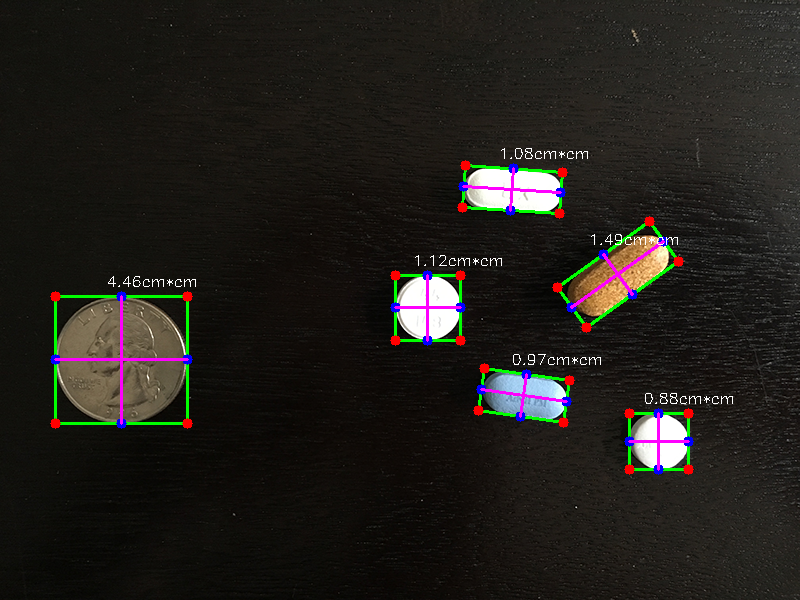

In [14]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import imutils
from imutils import perspective
import numpy as np

#carregamos a imagem, convertemos para níveis de cinza e a borramos levemente
image = cv.imread('objects.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (7, 7), 0)

#calculamos as arestas e realizamos uma dilatação + erosão para fechar
#eventuais gaps entre as arestas dos objetos
edged = cv.Canny(gray, 50, 100)
edged = cv.dilate(edged, None, iterations=1)
edged = cv.erode(edged, None, iterations=1)


cnts = cv.findContours(edged.copy(),cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
(cnts, _) = contours.sort_contours(cnts)

width=2.43
pixelsPerMetric=None


def midpoint(ptA, ptB):
  return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

orig = image.copy()
#Percorre todos os contornos
for c in cnts:
  # se o contorno não é suficientemente grande, ignorá-lo
  if cv.contourArea(c) < 100:
    continue
  # calcula a bounding box rotacionada do contorno
  box = cv.minAreaRect(c)
  box = cv.boxPoints(box) 
  box = np.array(box, dtype="int")
  #ordena os pontos do contorno de tal modo que eles
  #apareçam na seguinte ordem: top-left, top-right,
  #bottom-right e bottom-left
  box = perspective.order_points(box)
  cv.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
  for (x, y) in box:
    cv.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)

  #obtém os pontos médios de top-left/top-right e bottom-left e bottom-right
  (tl, tr, br, bl) = box
  (tltrX, tltrY) = midpoint(tl, tr)
  (blbrX, blbrY) = midpoint(bl, br)
  
  #obtém os pontos médios de top-left/bottom-left e top-right e bottom-right
  (tlblX, tlblY) = midpoint(tl, bl)
  (trbrX, trbrY) = midpoint(tr, br)

  #desenha cículos nos pontos-médios
  cv.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
  
  #une os pontos-médios com segmentos de reta
  cv.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),(255, 0, 255), 2)
  cv.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),(255, 0, 255), 2)
  
  dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
  dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
  
  if pixelsPerMetric is None:
    pixelsPerMetric = dB / width
  
  dimA = dA / pixelsPerMetric
  dimB = dB / pixelsPerMetric

  area=3.14*(dimA/2.0)*(dimB/2.0)
  
  cv.putText(orig, "{:.2f}cm*cm".format(area),(int(tltrX - 15), int(tltrY - 10)), cv.FONT_HERSHEY_SIMPLEX,0.50, (255, 255, 255), 1)
  #cv.putText(orig, "{:.2f}cm".format(dimA),(int(trbrX + 10), int(trbrY)), cv.FONT_HERSHEY_SIMPLEX,0.50, (255, 255, 255), 1)
cv2_imshow(orig)

#### <b>Obtenção de Perímetro</b>

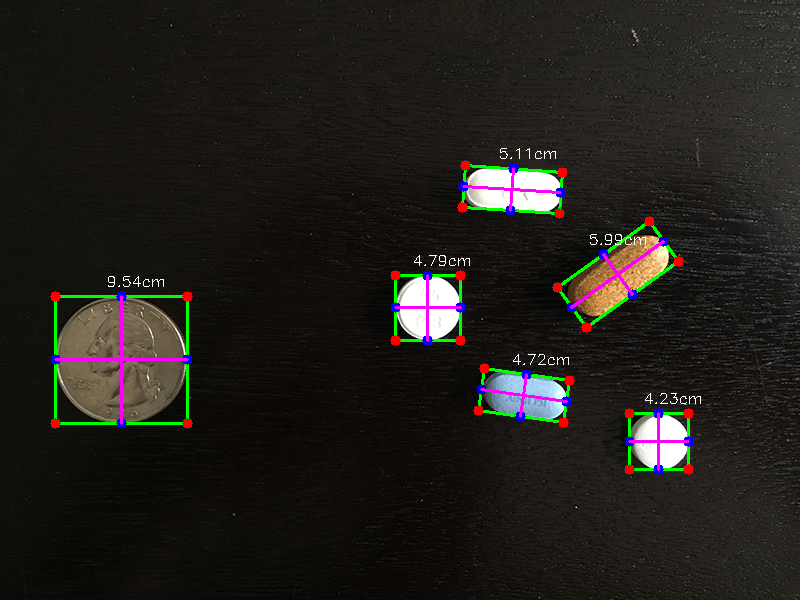

In [15]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import imutils
from imutils import perspective
import numpy as np

#carregamos a imagem, convertemos para níveis de cinza e a borramos levemente
image = cv.imread('objects.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (7, 7), 0)

#calculamos as arestas e realizamos uma dilatação + erosão para fechar
#eventuais gaps entre as arestas dos objetos
edged = cv.Canny(gray, 50, 100)
edged = cv.dilate(edged, None, iterations=1)
edged = cv.erode(edged, None, iterations=1)


cnts = cv.findContours(edged.copy(),cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
(cnts, _) = contours.sort_contours(cnts)

width=2.43
pixelsPerMetric=None


def midpoint(ptA, ptB):
  return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

orig = image.copy()
#Percorre todos os contornos
for c in cnts:
  # se o contorno não é suficientemente grande, ignorá-lo
  if cv.contourArea(c) < 100:
    continue
  # calcula a bounding box rotacionada do contorno
  box = cv.minAreaRect(c)
  box = cv.boxPoints(box) 
  box = np.array(box, dtype="int")
  #ordena os pontos do contorno de tal modo que eles
  #apareçam na seguinte ordem: top-left, top-right,
  #bottom-right e bottom-left
  box = perspective.order_points(box)
  cv.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
  for (x, y) in box:
    cv.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)

  #obtém os pontos médios de top-left/top-right e bottom-left e bottom-right
  (tl, tr, br, bl) = box
  (tltrX, tltrY) = midpoint(tl, tr)
  (blbrX, blbrY) = midpoint(bl, br)
  
  #obtém os pontos médios de top-left/bottom-left e top-right e bottom-right
  (tlblX, tlblY) = midpoint(tl, bl)
  (trbrX, trbrY) = midpoint(tr, br)

  #desenha cículos nos pontos-médios
  cv.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
  
  #une os pontos-médios com segmentos de reta
  cv.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),(255, 0, 255), 2)
  cv.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),(255, 0, 255), 2)
  
  dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
  dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
  
  if pixelsPerMetric is None:
    pixelsPerMetric = dB / width
  
  dimA = dA / pixelsPerMetric
  dimB = dB / pixelsPerMetric
  
  cv.putText(orig, "{:.2f}cm".format(2*(dimA+dimB)),(int(tltrX - 15), int(tltrY - 10)), cv.FONT_HERSHEY_SIMPLEX,0.50, (255, 255, 255), 1)
  #cv.putText(orig, "{:.2f}cm".format(dimA),(int(trbrX + 10), int(trbrY)), cv.FONT_HERSHEY_SIMPLEX,0.50, (255, 255, 255), 1)
cv2_imshow(orig)

Melhorando a estimativa dos perímetrs:

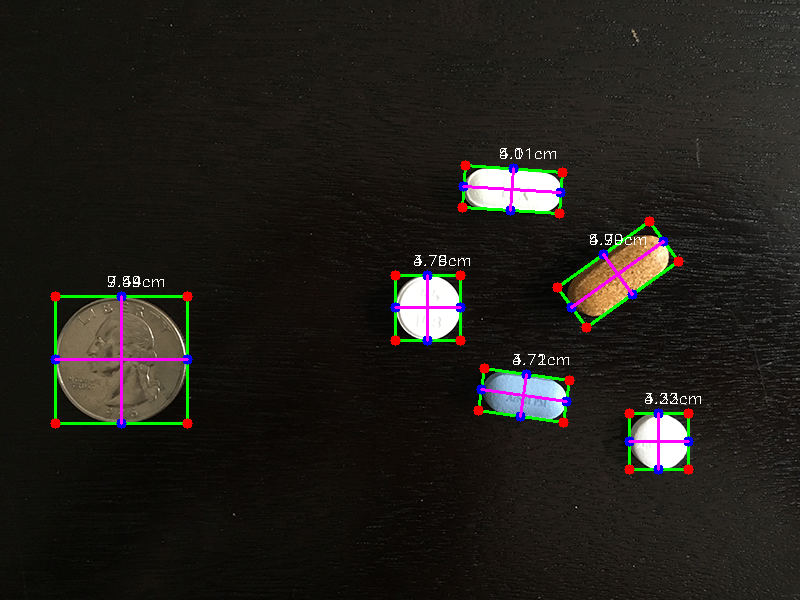

In [20]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import imutils
from imutils import perspective
import numpy as np

#carregamos a imagem, convertemos para níveis de cinza e a borramos levemente
image = cv.imread('objects.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (7, 7), 0)

#calculamos as arestas e realizamos uma dilatação + erosão para fechar
#eventuais gaps entre as arestas dos objetos
edged = cv.Canny(gray, 50, 100)
edged = cv.dilate(edged, None, iterations=1)
edged = cv.erode(edged, None, iterations=1)


cnts = cv.findContours(edged.copy(),cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
(cnts, _) = contours.sort_contours(cnts)

width=2.43
pixelsPerMetric=None


def midpoint(ptA, ptB):
  return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

orig = image.copy()
#Percorre todos os contornos
for c in cnts:
  # se o contorno não é suficientemente grande, ignorá-lo
  if cv.contourArea(c) < 100:
    continue
  # calcula a bounding box rotacionada do contorno
  box = cv.minAreaRect(c)
  box = cv.boxPoints(box) 
  box = np.array(box, dtype="int")
  #ordena os pontos do contorno de tal modo que eles
  #apareçam na seguinte ordem: top-left, top-right,
  #bottom-right e bottom-left
  box = perspective.order_points(box)
  cv.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
  for (x, y) in box:
    cv.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)

  #obtém os pontos médios de top-left/top-right e bottom-left e bottom-right
  (tl, tr, br, bl) = box
  (tltrX, tltrY) = midpoint(tl, tr)
  (blbrX, blbrY) = midpoint(bl, br)
  
  #obtém os pontos médios de top-left/bottom-left e top-right e bottom-right
  (tlblX, tlblY) = midpoint(tl, bl)
  (trbrX, trbrY) = midpoint(tr, br)

  #desenha cículos nos pontos-médios
  cv.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
  
  #une os pontos-médios com segmentos de reta
  cv.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),(255, 0, 255), 2)
  cv.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),(255, 0, 255), 2)
  
  dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
  dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
  
  if pixelsPerMetric is None:
    pixelsPerMetric = dB / width
  
  dimA = dA / pixelsPerMetric
  dimB = dB / pixelsPerMetric
  
  cv.putText(orig, "{:.2f}cm".format(2*dimA+2*dimB),(int(tltrX - 15), int(tltrY - 10)), cv.FONT_HERSHEY_SIMPLEX,0.50, (255, 255, 255), 1)
  
  
  
  
  
  
  cv.putText(orig, "{:.2f}cm".format(2*3.14*(dimA/2.0+dimB/2.0)/2.0),(int(tltrX - 15), int(tltrY - 10)), cv.FONT_HERSHEY_SIMPLEX,0.50, (255, 255, 255), 1)
  #cv.putText(orig, "{:.2f}cm".format(dimA),(int(trbrX + 10), int(trbrY)), cv.FONT_HERSHEY_SIMPLEX,0.50, (255, 255, 255), 1)
cv2_imshow(orig)

**EXERCÍCIO**

O objeto mais à esquerda na imagem abaixo possui um comprimento de 8.89cm. Estime o tamanho de cada um dos objetos desta imagem.


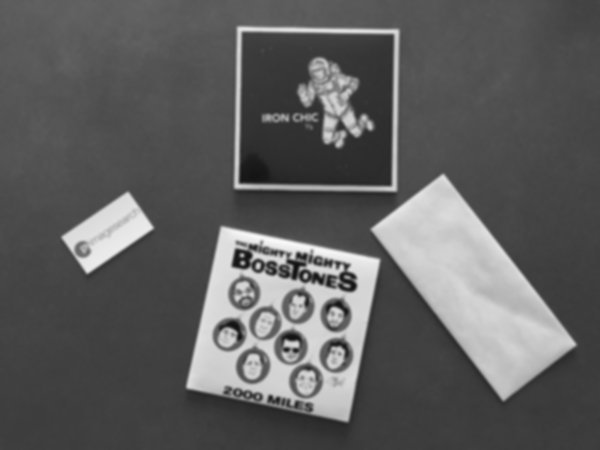

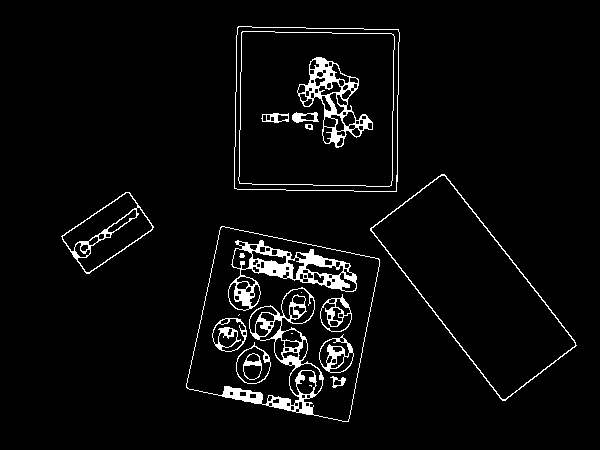

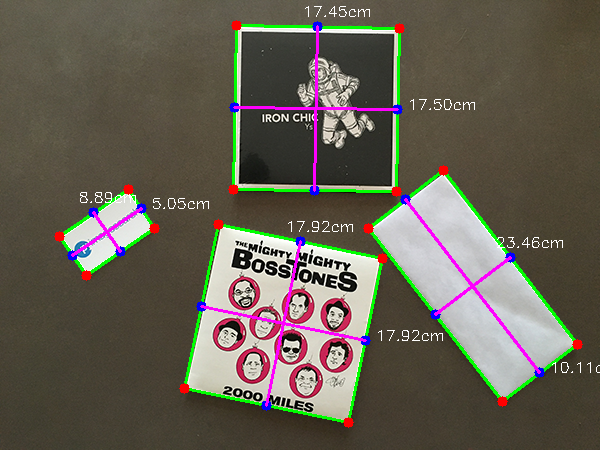

In [21]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import imutils
from imutils import perspective
import numpy as np

#carregamos a imagem, convertemos para níveis de cinza e a borramos levemente
image = cv.imread('objects2.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (7, 7), 0)

cv2_imshow(gray)

#calculamos as arestas e realizamos uma dilatação + erosão para fechar
#eventuais gaps entre as arestas dos objetos
edged = cv.Canny(gray, 50, 100)
edged = cv.dilate(edged, None, iterations=1)
edged = cv.erode(edged, None, iterations=1)

cv2_imshow(edged)

cnts = cv.findContours(edged.copy(),cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
(cnts, _) = contours.sort_contours(cnts)

width=8.89

pixelsPerMetric=None


def midpoint(ptA, ptB):
  return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

orig = image.copy()
#Percorre todos os contornos
for c in cnts:
  # se o contorno não é suficientemente grande, ignorá-lo
  if cv.contourArea(c) < 100:
    continue
  # calcula a bounding box rotacionada do contorno
  box = cv.minAreaRect(c)
  box = cv.boxPoints(box) 
  box = np.array(box, dtype="int")
  #ordena os pontos do contorno de tal modo que eles
  #apareçam na seguinte ordem: top-left, top-right,
  #bottom-right e bottom-left
  box = perspective.order_points(box)
  cv.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
  for (x, y) in box:
    cv.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)

  #obtém os pontos médios de top-left/top-right e bottom-left e bottom-right
  (tl, tr, br, bl) = box
  (tltrX, tltrY) = midpoint(tl, tr)
  (blbrX, blbrY) = midpoint(bl, br)
  
  #obtém os pontos médios de top-left/bottom-left e top-right e bottom-right
  (tlblX, tlblY) = midpoint(tl, bl)
  (trbrX, trbrY) = midpoint(tr, br)

  #desenha cículos nos pontos-médios
  cv.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
  cv.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
  
  #une os pontos-médios com segmentos de reta
  cv.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),(255, 0, 255), 2)
  cv.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),(255, 0, 255), 2)
  
  dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
  dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
  
  if pixelsPerMetric is None:
    pixelsPerMetric = dB / width
  
  dimA = dA / pixelsPerMetric
  dimB = dB / pixelsPerMetric
  
  cv.putText(orig, "{:.2f}cm".format(dimB),(int(tltrX - 15), int(tltrY - 10)), cv.FONT_HERSHEY_SIMPLEX,0.50, (255, 255, 255), 1)
  cv.putText(orig, "{:.2f}cm".format(dimA),(int(trbrX + 10), int(trbrY)), cv.FONT_HERSHEY_SIMPLEX,0.50, (255, 255, 255), 1)
cv2_imshow(orig)

#### <b>AULA 13- TEMPLATE MATCHING</b>

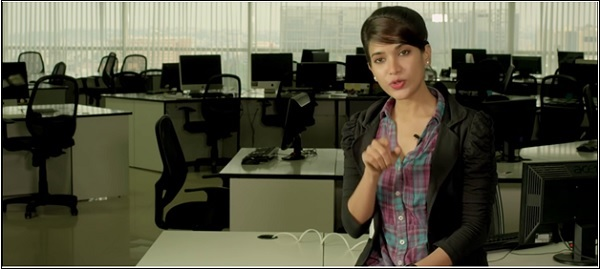

In [22]:
import cv2 as cv
from google.colab.patches import cv2_imshow
imagem = cv.imread('imagem.jpg')
cv2_imshow(imagem)

Nesta imagem, estamos interessados em encontrar a posição das mãos da mulher. Para isto, podemos definir um **template** para realizar a busca:

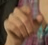

In [23]:
template = cv.imread('template.png')
cv2_imshow(template)

A técnica de Template Matching (Casamento de Padrões) consiste de alguns passos básicos:

*   Converta a imagem onde será realizada a busca para níveis de cinza.
*   Converta o template também para níveis de cinza.
*   Percorra o template sobre cada posição da imagem, calculando o nível de acurácia (proximidade) de cada posição.
*   Quando o nível de acurácia for maior que um limite de acurácia estabelecido, marque esta posição como posição de detecção (match position). 

Abaixo, temos um exemplo de aplicação de Template Matching com a OpenCV em Python:

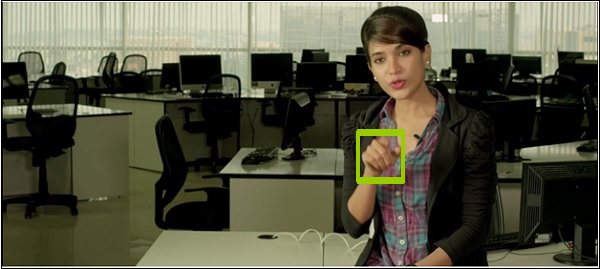

In [24]:
import cv2 as cv
import numpy as np

#abre a imagem onde a busca será realizada e a converte para níveis de cinbza
main_image = cv.imread('imagem.jpg')
gray_image = cv.cvtColor(main_image, cv.COLOR_BGR2GRAY)
#abre o template e o converte para níveis de cinza
template = cv.cvtColor(cv.imread('template.png'), cv.COLOR_BGR2GRAY)
#comprimento e largura do template
width,height=template.shape
#template matching, que devolve o nível de acurácia
match = cv.matchTemplate(gray_image, template, cv.TM_CCOEFF_NORMED)
#obtém as posições onde o template gerou níveis de acurácia maiores que um limiar
threshold = 0.8
position = np.where(match >= threshold)
#desenha os retângulos com as regiões encontradas
for point in zip(*position[::-1]): 
   cv.rectangle(main_image, point, (point[0] + width, point[1] + height), (0, 204, 153), 0)
cv2_imshow(main_image)